## Installing and Importing Libraries

In [42]:
from textblob import TextBlob
import sys
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
import pycountry
import re
import string

from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from langdetect import detect
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer

## Authentication fot Twitter API

In [43]:
consumerKey = "n2IUHNTOSuzg0DXANaUwSBXVj"
consumerSecret = "ygk8ubmMZmUGIUeQKUEjLkHxEuCIBR91Hh53EvJyDviL0mRHRY"
accessToken = "784300055003926528-fv8UcFeTBDduP4025OSCahI9yOor4qR"
accessTokenSecret = "Bm58zDoW4G30hQazsSv5nryhkweabTwm8x1hG7hcAeRxg"
auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(auth, wait_on_rate_limit=True)

## Getting Tweets With Keyword or Hashtag

In [44]:
#Sentiment Analysis
def percentage(part,whole):
    return 100 * float(part)/float(whole) 

keyword = input("Please enter keyword or hashtag to search: ")
noOfTweet = int(input ("Please enter how many tweets to analyze: "))


tweets = tweepy.Cursor(api.search_tweets , q=keyword).items(noOfTweet)
positive  = 0
negative = 0
neutral = 0
polarity = 0
tweet_list = []
neutral_list = []
negative_list = []
positive_list = []
 
for tweet in tweets:
    
    #print(tweet.text)
    tweet_list.append(tweet.text)
    analysis = TextBlob(tweet.text)
    score = SentimentIntensityAnalyzer().polarity_scores(tweet.text)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    polarity += analysis.sentiment.polarity
    
    if neg > pos:
        negative_list.append(tweet.text)
        negative += 1

    elif pos > neg:
        positive_list.append(tweet.text)
        positive += 1
    
    elif pos == neg:
        neutral_list.append(tweet.text)
        neutral += 1

positive = percentage(positive, noOfTweet)
negative = percentage(negative, noOfTweet)
neutral = percentage(neutral, noOfTweet)
polarity = percentage(polarity, noOfTweet)
positive = format(positive, '.1f')
negative = format(negative, '.1f')
neutral = format(neutral, '.1f')

Please enter keyword or hashtag to search: python
Please enter how many tweets to analyze: 200


### Number of Tweets (Total, Positive, Negative, Neutral)

In [45]:
tweet_list = pd.DataFrame(tweet_list)
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)
print("total number: ",len(tweet_list))
print("positive number: ",len(positive_list))
print("negative number: ", len(negative_list))
print("neutral number: ",len(neutral_list))

total number:  200
positive number:  65
negative number:  27
neutral number:  108


In [46]:
tweet_list

,0
0,RT @enricomolinari: #AR &amp; #VR market for #...
1,RT @enricomolinari: #AR &amp; #VR market for #...
2,RT @MenstraulM: 🚩 she's meddling with 9-13 yr ...
3,RT @Enter_Entendre: Morals Matter #Security th...
4,"RT @Femisonic: HEY DEVS, TAKE THIS SURVEY &amp..."
...,...
195,RT @VeilleCyber3: Could a #DeepFake unlock an ...
196,RT @VeilleCyber3: 45% of #cybersecurity pros a...
197,RT @VeilleCyber3: #Ethics &amp; #ArtificialInt...
198,RT @VeilleCyber3: Investors show #LatAm #finte...


## Creating PieCart

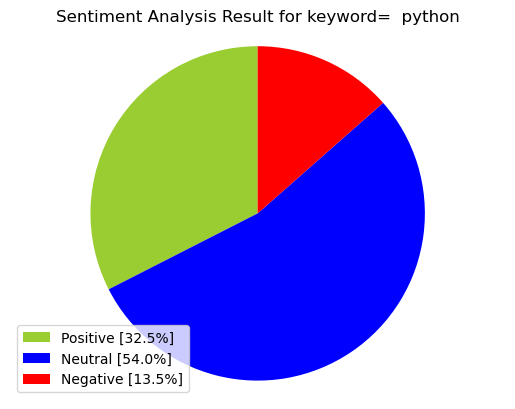

In [47]:
labels = ['Positive ['+str(positive)+'%]' , 'Neutral ['+str(neutral)+'%]','Negative ['+str(negative)+'%]']
sizes = [positive, neutral, negative]
colors = ['yellowgreen', 'blue','red']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title("Sentiment Analysis Result for keyword=  "+keyword+"" )
plt.axis('equal')
plt.show()

## Cleaning Tweets to Analyse Sentiment

In [48]:
tweet_list.drop_duplicates(inplace = True)

tw_list = pd.DataFrame(tweet_list)
tw_list["text"] = tw_list[0]
tw_list

,0,text
0,RT @enricomolinari: #AR &amp; #VR market for #...,RT @enricomolinari: #AR &amp; #VR market for #...
2,RT @MenstraulM: 🚩 she's meddling with 9-13 yr ...,RT @MenstraulM: 🚩 she's meddling with 9-13 yr ...
3,RT @Enter_Entendre: Morals Matter #Security th...,RT @Enter_Entendre: Morals Matter #Security th...
4,"RT @Femisonic: HEY DEVS, TAKE THIS SURVEY &amp...","RT @Femisonic: HEY DEVS, TAKE THIS SURVEY &amp..."
5,RT @JamesSm51300698: Buy verified PayPal accou...,RT @JamesSm51300698: Buy verified PayPal accou...
...,...,...
193,RT @gp_pulipaka: 107 Free Data #Science Textbo...,RT @gp_pulipaka: 107 Free Data #Science Textbo...
195,RT @VeilleCyber3: Could a #DeepFake unlock an ...,RT @VeilleCyber3: Could a #DeepFake unlock an ...
196,RT @VeilleCyber3: 45% of #cybersecurity pros a...,RT @VeilleCyber3: 45% of #cybersecurity pros a...
197,RT @VeilleCyber3: #Ethics &amp; #ArtificialInt...,RT @VeilleCyber3: #Ethics &amp; #ArtificialInt...


In [49]:
tweet_list

,0,text
0,RT @enricomolinari: #AR &amp; #VR market for #...,RT @enricomolinari: #AR &amp; #VR market for #...
2,RT @MenstraulM: 🚩 she's meddling with 9-13 yr ...,RT @MenstraulM: 🚩 she's meddling with 9-13 yr ...
3,RT @Enter_Entendre: Morals Matter #Security th...,RT @Enter_Entendre: Morals Matter #Security th...
4,"RT @Femisonic: HEY DEVS, TAKE THIS SURVEY &amp...","RT @Femisonic: HEY DEVS, TAKE THIS SURVEY &amp..."
5,RT @JamesSm51300698: Buy verified PayPal accou...,RT @JamesSm51300698: Buy verified PayPal accou...
...,...,...
193,RT @gp_pulipaka: 107 Free Data #Science Textbo...,RT @gp_pulipaka: 107 Free Data #Science Textbo...
195,RT @VeilleCyber3: Could a #DeepFake unlock an ...,RT @VeilleCyber3: Could a #DeepFake unlock an ...
196,RT @VeilleCyber3: 45% of #cybersecurity pros a...,RT @VeilleCyber3: 45% of #cybersecurity pros a...
197,RT @VeilleCyber3: #Ethics &amp; #ArtificialInt...,RT @VeilleCyber3: #Ethics &amp; #ArtificialInt...


## Cleaning Text (RT, Punctuation etc)

In [50]:
#Creating new dataframe and new features
tw_list = pd.DataFrame(tweet_list)
tw_list["text"] = tw_list[0]

#Removing RT, Punctuation etc
remove_rt = lambda x: re.sub('RT @\w+: '," ",x)
rt = lambda x: re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",x)
tw_list["text"] = tw_list.text.map(remove_rt).map(rt)
tw_list["text"] = tw_list.text.str.lower()
tw_list.head(10)

,0,text
0,RT @enricomolinari: #AR &amp; #VR market for #...,ar amp vr market for metaverse by 2025 ...
2,RT @MenstraulM: 🚩 she's meddling with 9-13 yr ...,she s meddling with 9 13 yr old children tr...
3,RT @Enter_Entendre: Morals Matter #Security th...,morals matter security there is something ve...
4,"RT @Femisonic: HEY DEVS, TAKE THIS SURVEY &amp...",hey devs take this survey amp win macbook ...
5,RT @JamesSm51300698: Buy verified PayPal accou...,buy verified paypal accounts all document ver...
6,@JeremySCook IDK. I feel there's an immense am...,idk i feel there s an immense amount of pow...
8,RT @driscollis: Sending email with attachments...,sending email with attachments in python is ...
9,Excited to share the latest addition to my #et...,excited to share the latest addition to my et...
11,@AlyssaM_InfoSec Reminds me of this scene from...,infosec reminds me of this scene from monty ...
12,RT @mattbierner: Today's @code extension: Inde...,today s extension indent rainbow indent r...


## Sentiment Analyse

In [51]:
# Calculating Negative, Positive, Neutral and Compound values

tw_list[['polarity', 'subjectivity']] = tw_list['text'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
for index, row in tw_list['text'].iteritems():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    if neg > pos:
        tw_list.loc[index, 'sentiment'] = "negative"
    elif pos > neg:
        tw_list.loc[index, 'sentiment'] = "positive"
    else:
        tw_list.loc[index, 'sentiment'] = "neutral"
    tw_list.loc[index, 'neg'] = neg
    tw_list.loc[index, 'neu'] = neu
    tw_list.loc[index, 'pos'] = pos
    tw_list.loc[index, 'compound'] = comp

tw_list.head(10)

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,RT @enricomolinari: #AR &amp; #VR market for #...,ar amp vr market for metaverse by 2025 ...,0.000000,0.000000,positive,0.000,0.843,0.157,0.3818
2,RT @MenstraulM: 🚩 she's meddling with 9-13 yr ...,she s meddling with 9 13 yr old children tr...,0.100000,0.150000,negative,0.312,0.688,0.000,-0.7783
3,RT @Enter_Entendre: Morals Matter #Security th...,morals matter security there is something ve...,-0.470833,0.770833,positive,0.207,0.530,0.263,0.0971
4,"RT @Femisonic: HEY DEVS, TAKE THIS SURVEY &amp...",hey devs take this survey amp win macbook ...,0.800000,0.400000,positive,0.000,0.759,0.241,0.5859
5,RT @JamesSm51300698: Buy verified PayPal accou...,buy verified paypal accounts all document ver...,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000
6,@JeremySCook IDK. I feel there's an immense am...,idk i feel there s an immense amount of pow...,-0.145833,0.770833,negative,0.135,0.865,0.000,-0.2023
8,RT @driscollis: Sending email with attachments...,sending email with attachments in python is ...,0.000000,0.750000,positive,0.000,0.900,0.100,0.2732
9,Excited to share the latest addition to my #et...,excited to share the latest addition to my et...,0.236111,0.694444,positive,0.000,0.777,0.223,0.5574
11,@AlyssaM_InfoSec Reminds me of this scene from...,infosec reminds me of this scene from monty ...,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000
12,RT @mattbierner: Today's @code extension: Inde...,today s extension indent rainbow indent r...,0.500000,0.500000,negative,0.106,0.894,0.000,-0.2263


In [52]:
#Creating new data frames for all sentiments (positive, negative and neutral)

tw_list_negative = tw_list[tw_list["sentiment"]=="negative"]
tw_list_positive = tw_list[tw_list["sentiment"]=="positive"]
tw_list_neutral = tw_list[tw_list["sentiment"]=="neutral"] 

In [53]:
#Function for count_values_in single columns

def count_values_in_column(data,feature):
    total=data.loc[:,feature].value_counts(dropna=False)
    percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])

In [54]:
#Count_values for sentiment
count_values_in_column(tw_list,"sentiment")

,Total,Percentage
neutral,78,55.71
positive,44,31.43
negative,18,12.86


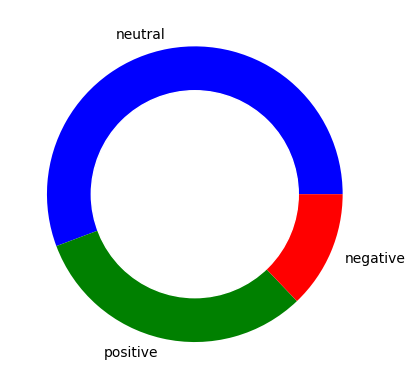

In [55]:
# create data for Pie Chart
piechart = count_values_in_column(tw_list,"sentiment")
names= piechart.index
size=piechart["Percentage"]
 
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(size, labels=names, colors=['blue','green','red'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

## Function to Create Wordcloud

In [56]:
def create_wordcloud(text):
    mask = np.array(Image.open("cloud.png"))
    stopwords = set(STOPWORDS)
    wc = WordCloud(background_color="white",
                  mask = mask,
                  max_words=3000,
                  stopwords=stopwords,
                  repeat=True)
    wc.generate(str(text))
    wc.to_file("wc.png")
    print("Word Cloud Saved Successfully")
    path="wc.png"
    display(Image.open(path))

Word Cloud Saved Successfully


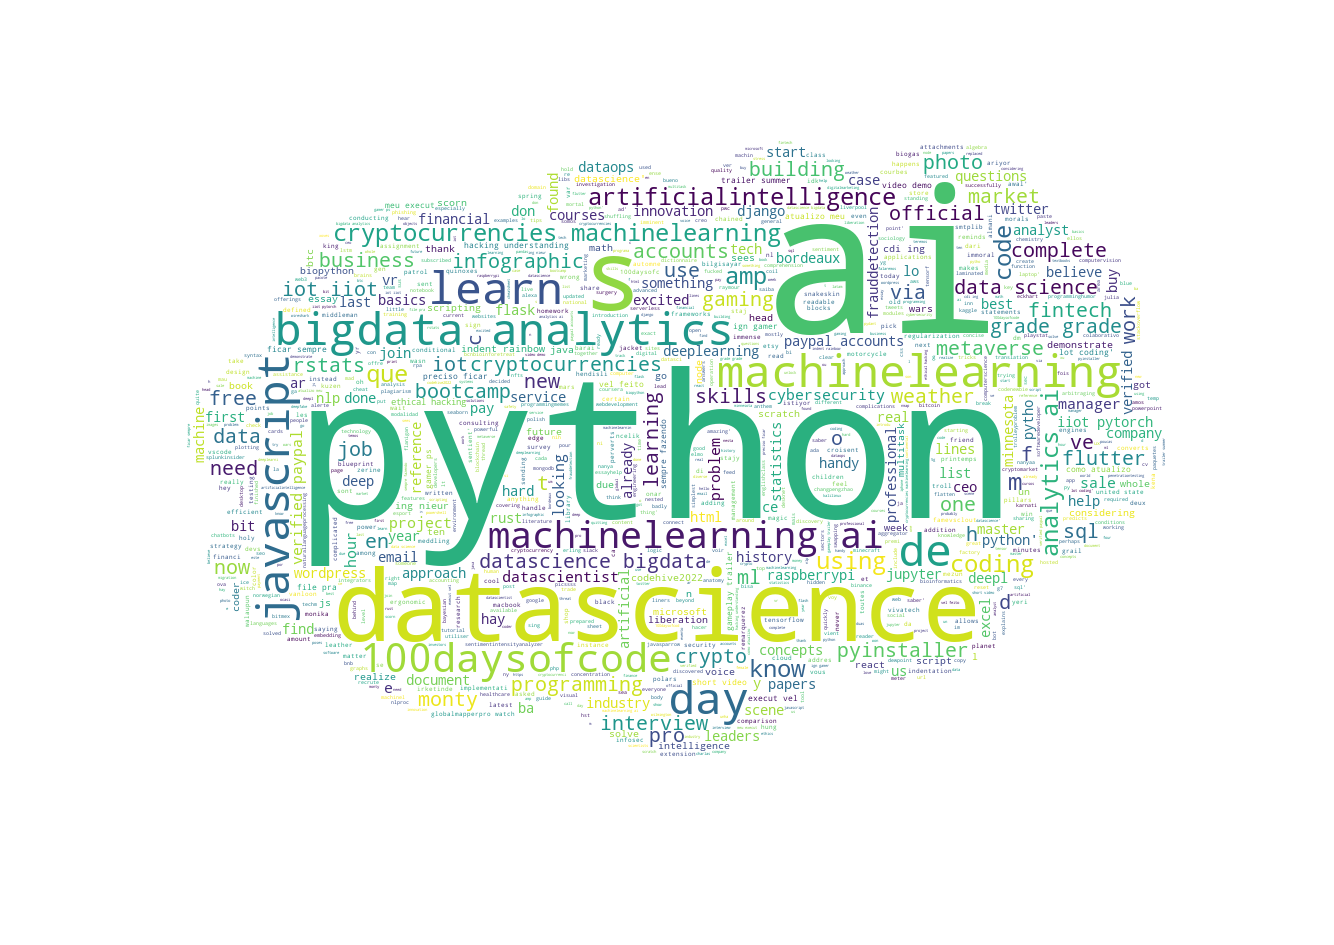

In [57]:
#Creating wordcloud for all tweets
create_wordcloud(tw_list["text"].values)

Word Cloud Saved Successfully


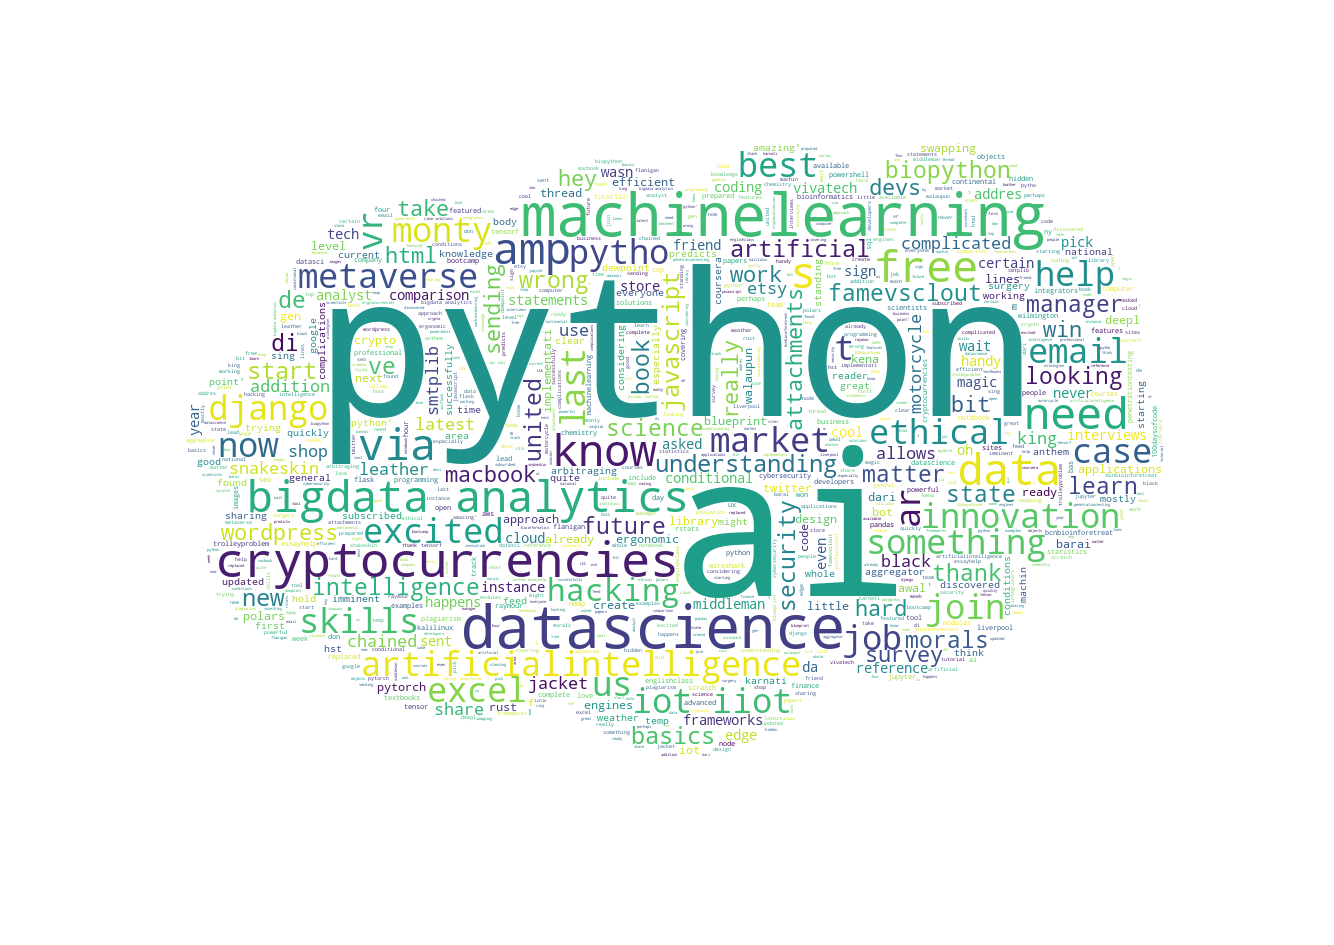

In [58]:
#Creating wordcloud for positive sentiment
create_wordcloud(tw_list_positive["text"].values)

Word Cloud Saved Successfully


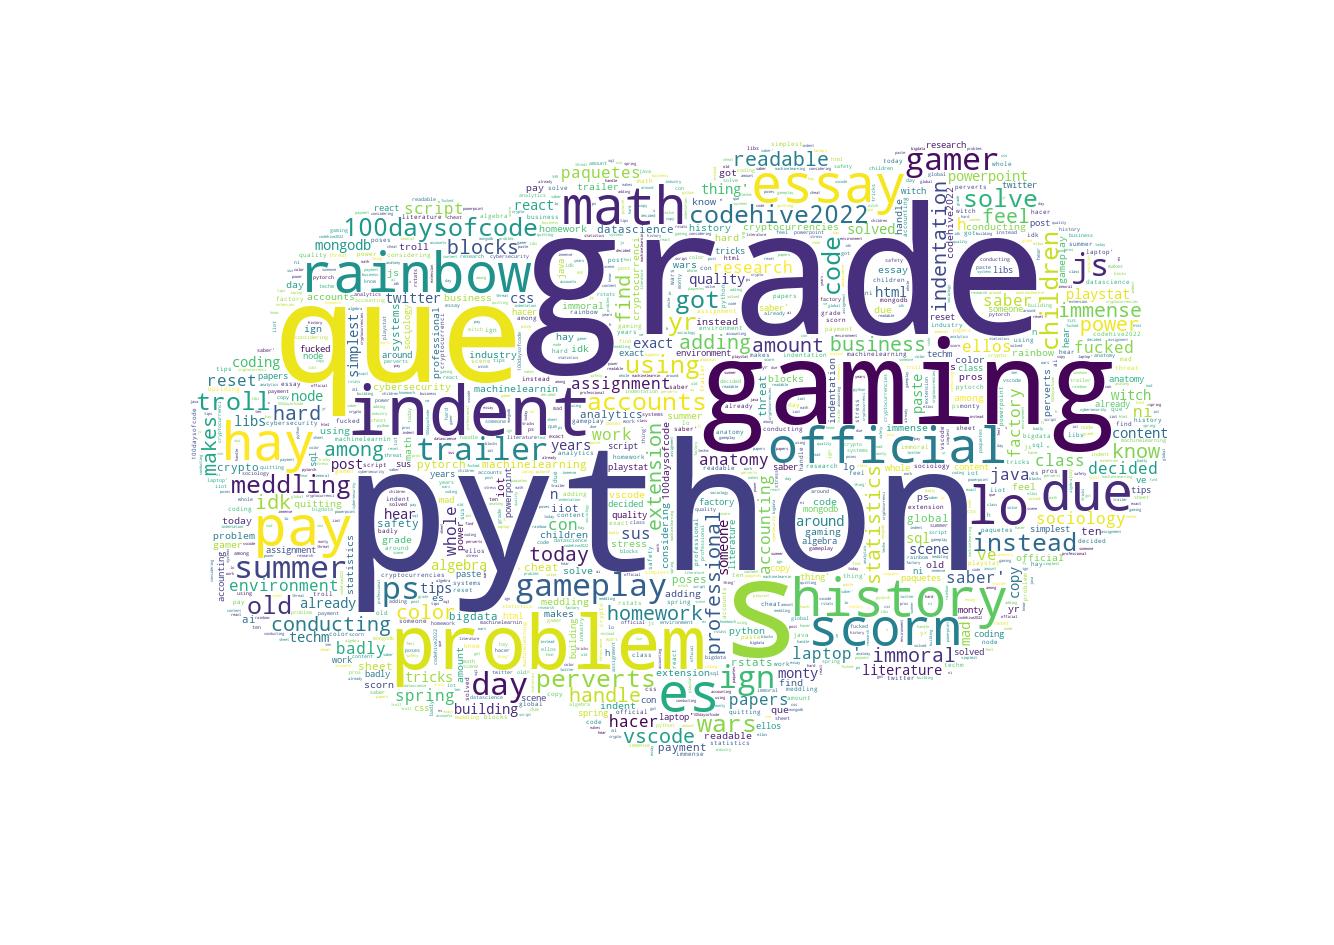

In [59]:
#Creating wordcloud for negative sentiment
create_wordcloud(tw_list_negative["text"].values)